In [36]:
import csv
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [38]:
NUM_CLASSES = 9

In [39]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [40]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [41]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [45]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
# Model training
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0859 - loss: 2.2104
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1023 - loss: 2.2067 - val_accuracy: 0.2438 - val_loss: 2.1283
Epoch 2/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1953 - loss: 2.1482
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1744 - loss: 2.1310 - val_accuracy: 0.1467 - val_loss: 2.0658
Epoch 3/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1172 - loss: 2.0984
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1711 - loss: 2.0876 - val_accuracy: 0.1609 - val_loss: 2.0107
Epoch 4/1000
15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2194 - loss: 2.0416 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [47]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9600 - loss: 0.1557


In [48]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [49]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[7.7077260e-07 3.1717573e-07 4.5343659e-06 1.9130724e-02 9.3844910e-06
 1.0005512e-04 1.3191208e-05 4.2392963e-05 9.8069853e-01]
8


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


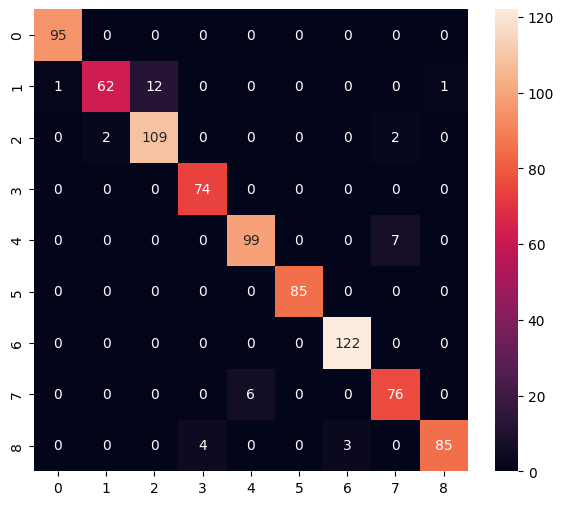

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       0.97      0.82      0.89        76
           2       0.90      0.96      0.93       113
           3       0.95      1.00      0.97        74
           4       0.94      0.93      0.94       106
           5       1.00      1.00      1.00        85
           6       0.98      1.00      0.99       122
           7       0.89      0.93      0.91        82
           8       0.99      0.92      0.96        92

    accuracy                           0.96       845
   macro avg       0.96      0.95      0.95       845
weighted avg       0.96      0.96      0.95       845



In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [51]:

# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [52]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\AMINUL~1\AppData\Local\Temp\tmpn13yurmr\assets


INFO:tensorflow:Assets written to: C:\Users\AMINUL~1\AppData\Local\Temp\tmpn13yurmr\assets


Saved artifact at 'C:\Users\AMINUL~1\AppData\Local\Temp\tmpn13yurmr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  2804436145488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2804436149904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2804436150288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2804436150096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2804436151056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2804436151248: TensorSpec(shape=(), dtype=tf.resource, name=None)


6776